In [1]:
import pandas as pd
dataset = pd.read_csv('D:/Data/SMSSpamCollection.csv', sep='\t', names=['class','message'])

In [2]:
dataset['label'] = dataset['class'].map({'ham':0, 'spam':1})       # ham : 0  , spam : 1

In [3]:
dataset.head()       # Dataset is ready

,class,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
# 2. Data Cleaning and now we remove stopwords which are not usefule to tell its spam or ham.

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus=[]      # after preprocessing the data , we put messages into 'corpus'

for i in range(0, len(dataset.message)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [41]:
# 3.Create Bag of Words(Document matrix)  using CountVectorizer , we can also  use TF-IDF

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)

X = cv.fit_transform(corpus).toarray()    # X - independent feature - message

y = dataset.iloc[:,2].values        # y - dependent feature - label

In [66]:
# 4. Now we split the dataset for training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
# 5. Now we create the model using Naive Bayes  (it works well with NLP)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
print('Accuracy of testing set :', model.score(X_test, y_test))

Accuracy of testing set : 0.9813352476669059


In [84]:
# Sample prediction

comment = ['its very good', 'Free entry']
vect = cv.transform(comment).toarray()

model.predict(vect)

array([0, 1], dtype=int64)

In [85]:
# 6.Saving the model using joblib

from sklearn.externals import joblib

joblib.dump(model, 'SMSSpam_model')        # Here we dump the model in 'SMSSpam_model' file

['SMSSpam_model']

In [86]:
SMS_spam_model = joblib.load('SMSSpam_model')     # Here we load the model in 'SMS_sapm_model' var. that dump file

In [88]:
# Check using this joblib model after lading

message1 = ['this is so good']
vect1 = cv.transform(message1)

predd = SMS_spam_model.predict(vect1)

In [89]:
predd

array([0], dtype=int64)

### Creating Word Cloud of  Bag of words

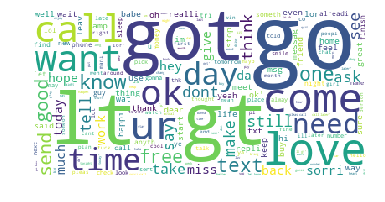

In [14]:
from wordcloud import WordCloud                                        # pip install wordcloud, pillow 
import matplotlib.pyplot as plt

cloud = WordCloud(background_color='white').generate(str(corpus))          # Here corpus in list converted into str
 
plt.imshow(cloud)
plt.axis('off')
plt.show()